<a href="https://colab.research.google.com/github/Dkepffl/Causal-Inference/blob/main/Code/Causal_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DoWhy 패키지 다운로드**
- [Dowhy 패키지](https://www.pywhy.org/dowhy/v0.8/getting_started/install.html)

In [ ]:
!pip install dowhy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.2/399.2 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.6/293.6 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.6.7
    Uninstalling cvxpy-1.6.7:
      Successfully uninstalled cvxpy-1.6.7


## **EcoML 설치**

In [ ]:
!pip install econml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 10.0 MB/s eta 0:00:00


## **라이브러리와 데이터 불러오기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

import dowhy
from dowhy import CausalModel

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Causal_Inference/Data/merged_df.csv')
df.head()

,Year,Month,Num_Audience,Movie_Revenue,Num_Theaters,Num_Screen,OTT_sales,OTT_UserRate,Pandemic,GDP,unemployed,unemp_rate,youth_unemployed,youth_unemp_rate,n_covid
0,2018,1,22943456,183097961855,159,394,0,0.0,False,"476,772.5",102.0,3.7,37.1,8.7,0
1,2018,2,15551760,126413965804,125,391,0,0.0,False,"476,772.5",126.5,4.6,42.1,9.8,0
2,2018,3,12801511,103712715080,154,460,0,0.0,False,"476,772.5",125.7,4.5,50.7,11.6,0
3,2018,4,14066243,119735148093,146,439,0,0.0,False,"499,011.9",116.1,4.1,46.1,10.7,0
4,2018,5,15891715,138814866360,144,446,0,0.0,False,"499,011.9",112.1,4.0,46.0,10.5,0


In [ ]:
df.columns

Index(['Year', 'Month', 'Num_Audience', 'Movie_Revenue', 'Num_Theaters',
       'Num_Screen', 'OTT_sales', 'OTT_UserRate', 'Pandemic', 'GDP',
       'unemployed', 'unemp_rate', 'youth_unemployed', 'youth_unemp_rate ',
       'n_covid'],
      dtype='object')

In [ ]:
df_causal = df.copy().drop(columns=['Num_Theaters','unemployed','youth_unemployed','youth_unemp_rate '], axis=1)
df_causal['Movie_Revenue'] = df_causal['Movie_Revenue']/100000000
df_causal.head()

,Year,Month,Num_Audience,Movie_Revenue,Num_Screen,OTT_sales,OTT_UserRate,Pandemic,GDP,unemp_rate,n_covid
0,2018,1,22943456,1830.979619,394,0,0.0,False,"476,772.5",3.7,0
1,2018,2,15551760,1264.139658,391,0,0.0,False,"476,772.5",4.6,0
2,2018,3,12801511,1037.127151,460,0,0.0,False,"476,772.5",4.5,0
3,2018,4,14066243,1197.351481,439,0,0.0,False,"499,011.9",4.1,0
4,2018,5,15891715,1388.148664,446,0,0.0,False,"499,011.9",4.0,0


In [ ]:
df_causal.columns = ['Year','Month', 'X','Z','Q','S','R','C','W','T','N']
df_causal.head()

,Year,Month,X,Z,Q,S,R,C,W,T,N
0,2018,1,22943456,1830.979619,394,0,0.0,False,"476,772.5",3.7,0
1,2018,2,15551760,1264.139658,391,0,0.0,False,"476,772.5",4.6,0
2,2018,3,12801511,1037.127151,460,0,0.0,False,"476,772.5",4.5,0
3,2018,4,14066243,1197.351481,439,0,0.0,False,"499,011.9",4.1,0
4,2018,5,15891715,1388.148664,446,0,0.0,False,"499,011.9",4.0,0


## **시각화**

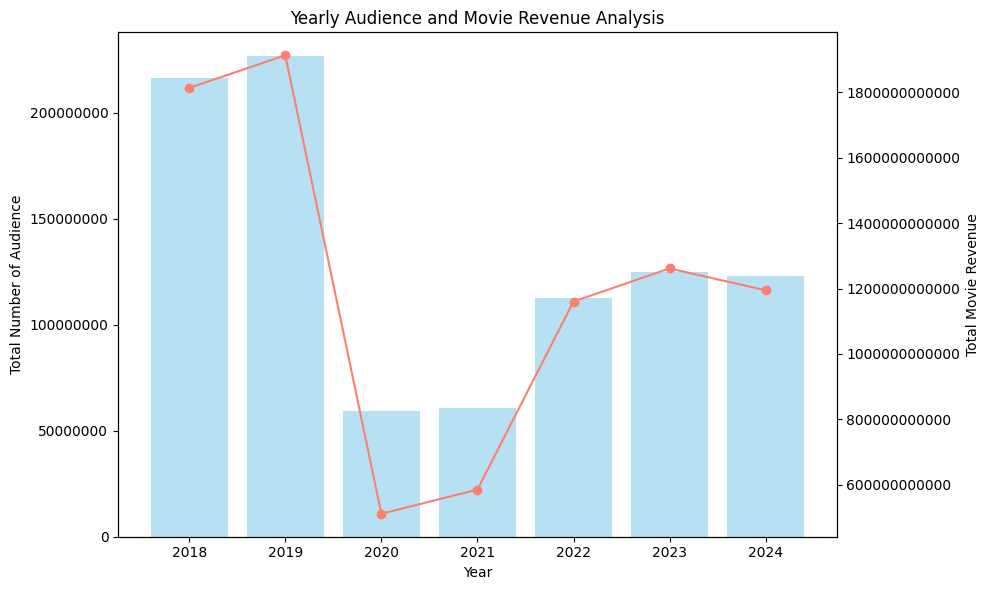

In [ ]:
import matplotlib.pyplot as plt

# 1. 'Year'를 기준으로 데이터 집계
df_yearly = df.groupby('Year').agg({
    'Num_Audience': 'sum',
    'Movie_Revenue': 'sum'
}).reset_index()

# 2. 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 축 (ax1)에 막대 그래프 그리기 (Num_Audience)
color = 'skyblue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Number of Audience', color='black')
ax1.bar(df_yearly['Year'], df_yearly['Num_Audience'], color=color, alpha=0.6, label='Number of Audience')
ax1.tick_params(axis='y', labelcolor='black')

# y축 숫자를 일반 포맷으로 설정
ax1.ticklabel_format(style='plain', axis='y')

# 두 번째 축 (ax2)에 꺾은선 그래프 그리기 (Movie_Revenue)
ax2 = ax1.twinx()
color = 'salmon'
ax2.set_ylabel('Total Movie Revenue', color='black')
ax2.plot(df_yearly['Year'], df_yearly['Movie_Revenue'], color=color, marker='o', label='Movie Revenue')
ax2.tick_params(axis='y', labelcolor='black')

# y2축 숫자를 일반 포맷으로 설정
ax2.ticklabel_format(style='plain', axis='y')

# 제목 및 범례 설정
plt.title('Yearly Audience and Movie Revenue Analysis')
plt.xticks(df_yearly['Year'])
fig.tight_layout()

plt.show()

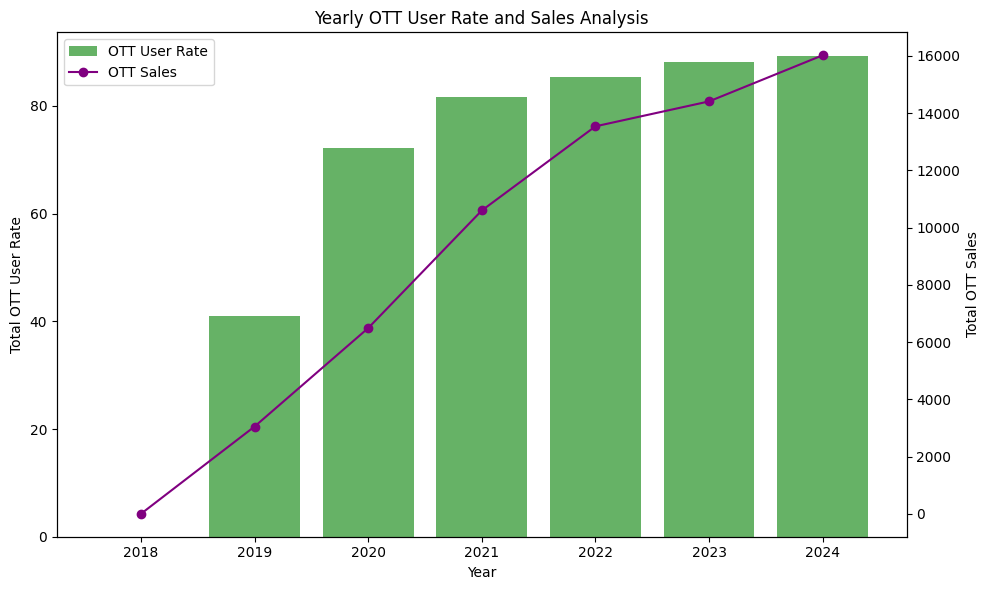

In [ ]:
# 1. 'Year'를 기준으로 데이터 집계
# 각 연도별 OTT_UserRate와 OTT_Sales의 합계 또는 평균을 계산합니다.
# OTT_UserRate는 평균값이 더 의미 있을 수 있지만, 여기서는 합계를 사용하겠습니다.
df_yearly_ott = df.groupby('Year').agg({
    'OTT_UserRate': 'mean',
    'OTT_sales': 'mean'
}).reset_index()

# 2. 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 축 (ax1)에 막대 그래프 그리기 (OTT_UserRate)
color = 'green'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total OTT User Rate', color='black')
ax1.bar(df_yearly_ott['Year'], df_yearly_ott['OTT_UserRate'], color=color, alpha=0.6, label='OTT User Rate')
ax1.tick_params(axis='y', labelcolor='black')

# 두 번째 축 (ax2)에 꺾은선 그래프 그리기 (OTT_Sales)
ax2 = ax1.twinx()
color = 'purple'
ax2.set_ylabel('Total OTT Sales', color='black')
ax2.plot(df_yearly_ott['Year'], df_yearly_ott['OTT_sales'], color=color, marker='o', label='OTT Sales')
ax2.tick_params(axis='y', labelcolor='black')

# 제목 및 범례 설정
plt.title('Yearly OTT User Rate and Sales Analysis')
plt.xticks(df_yearly_ott['Year'])
fig.tight_layout()

# 범례 표시
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

## **모델1**

### **1단계-가정 인코딩**

In [ ]:
##
nodes1 = ['X','Z','R','S']
edges1 = ['SZ','RX','XZ','RS']
gml_string1 = 'graph [directed 1\n'

for node in nodes1:
  gml_string1 += f'\tnode [id "{node}" label "{node}"]\n'

for edge in edges1:
  gml_string1 += f'\tedge [source "{edge[0]}" target "{edge[1]}"]\n'

gml_string1 += ']'

In [ ]:
print(gml_string1)

graph [directed 1
	node [id "X" label "X"]
	node [id "Z" label "Z"]
	node [id "R" label "R"]
	node [id "S" label "S"]
	edge [source "S" target "Z"]
	edge [source "R" target "X"]
	edge [source "X" target "Z"]
	edge [source "R" target "S"]
]


In [ ]:
model1 = CausalModel(
    data=df_causal,
    treatment='R',
    outcome='X',
    graph=gml_string1
)

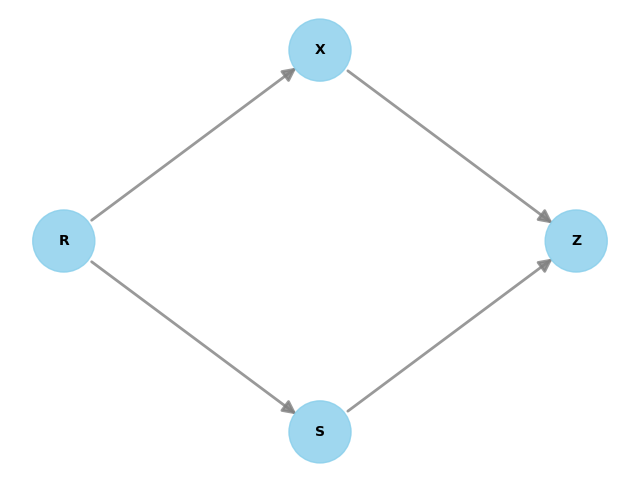

In [ ]:
model1.view_model()

### **2단계-추정량 구하기**

In [ ]:
estimand1 = model1.identify_effect()

In [ ]:
print(estimand1)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[X])
d[R]      
Estimand assumption 1, Unconfoundedness: If U→{R} and U→X then P(X|R,,U) = P(X|R,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
 d        
────(E[X])
d[R]      
Estimand assumption 1, Unconfoundedness: If U→{R} and U→X then P(X|R,,U) = P(X|R,)



### **3단계-추정!**

#### **linear model**

In [ ]:
estimate_lr1 = model1.estimate_effect(
    identified_estimand=estimand1,
    method_name='backdoor.linear_regression'
)

/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [ ]:
print(f'Estimate of causal effect (linear regression) : {estimate_lr1.value}')

Estimate of causal effect (linear regression) : -127979.98252425343


#### **DML**

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
estimate1 = model1.estimate_effect(
    identified_estimand=estimand1,
    method_name='backdoor.econml.dml.DML',
    method_params={
        'init_params' : {
            'model_y' : GradientBoostingRegressor(),
            'model_t' : GradientBoostingRegressor(),
            'model_final' : LassoCV(fit_intercept=False)
        },
    'fit_params': {}}
)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [ ]:
print(f'Estimate of causal effect (DML) : {estimate1.value}')

Estimate of causal effect (DML) : -114134.90355603503


### **4단계-반박하기**

#### **linear model**

In [ ]:
random_cause = model1.refute_estimate(
    estimand=estimand1,
    estimate=estimate_lr1,
    method_name='random_common_cause'
)

/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

In [ ]:
print(random_cause)

Refute: Add a random common cause
Estimated effect:-127979.98252425343
New effect:-127704.7942465521
p value:0.94



In [ ]:
placebo_refuter = model1.refute_estimate(
    estimand=estimand1,
    estimate=estimate_lr1,
    method_name='placebo_treatment_refuter'
)

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

In [ ]:
print(placebo_refuter)

Refute: Use a Placebo Treatment
Estimated effect:-127979.98252425343
New effect:0.0
p value:1.0



#### **DML**

In [ ]:
random_cause = model1.refute_estimate(
    estimand=estimand1,
    estimate=estimate1,
    method_name='random_common_cause'
)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a

In [ ]:
print(random_cause)

Refute: Add a random common cause
Estimated effect:-114134.90355603503
New effect:-118009.91573009212
p value:0.78



In [ ]:
placebo_refuter = model1.refute_estimate(
    estimand=estimand1,
    estimate=estimate1,
    method_name='placebo_treatment_refuter'
)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/econml/validate/sensitivity_analysis.py:143: RuntimeWarning: invalid value encountered in scalar divide
  theta = np.mean(y_res*t_res) / np.mean(t_res**2)  # Estimate the treatment effect
/usr/local/lib/python3.12/dist-packages/econml/validate/sensitivity_analysis.py:146: RuntimeWarning: divide by zero encountered in scalar divide
  nu2 = 1/np.mean(t_res**2)  # Estimate the v

LinAlgError: Singular matrix

In [ ]:
print(placebo_refuter)

## **모델2**

### **1단계-가정 인코딩**

In [ ]:
##
nodes2 = ['X','Z','R','S','N']
edges2 = ['SZ','RX','XZ','RS','NR','NX']
gml_string2 = 'graph [directed 1\n'

for node in nodes2:
  gml_string2 += f'\tnode [id "{node}" label "{node}"]\n'

for edge in edges2:
  gml_string2 += f'\tedge [source "{edge[0]}" target "{edge[1]}"]\n'

gml_string2 += ']'

In [ ]:
print(gml_string2)

graph [directed 1
	node [id "X" label "X"]
	node [id "Z" label "Z"]
	node [id "R" label "R"]
	node [id "S" label "S"]
	node [id "N" label "N"]
	edge [source "S" target "Z"]
	edge [source "R" target "X"]
	edge [source "X" target "Z"]
	edge [source "R" target "S"]
	edge [source "N" target "R"]
	edge [source "N" target "X"]
]


In [ ]:
model2 = CausalModel(
    data=df_causal,
    treatment='R',
    outcome='X',
    graph=gml_string2
)

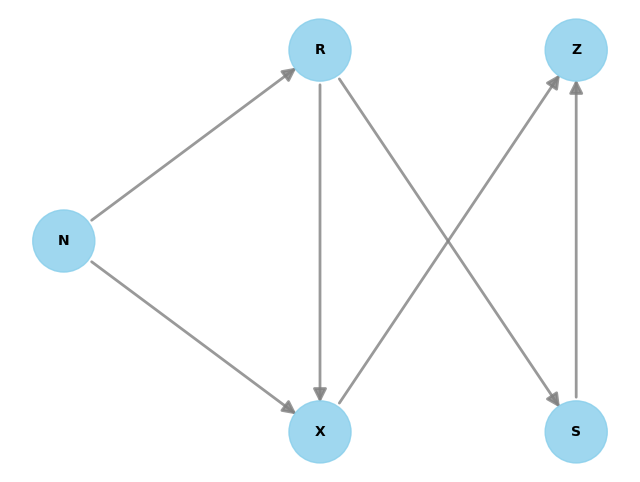

In [ ]:
model2.view_model()

### **2단계-추정량 구하기**

In [ ]:
estimand2 = model2.identify_effect()

In [ ]:
print(estimand2)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d          
────(E[X|N])
d[R]        
Estimand assumption 1, Unconfoundedness: If U→{R} and U→X then P(X|R,N,U) = P(X|R,N)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
 d          
────(E[X|N])
d[R]        
Estimand assumption 1, Unconfoundedness: If U→{R} and U→X then P(X|R,N,U) = P(X|R,N)



### **3단계-추정!**

#### **linear model**

In [ ]:
estimate_lr2 = model2.estimate_effect(
    identified_estimand=estimand2,
    method_name='backdoor.linear_regression'
)

/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [ ]:
print(f'Estimate of causal effect (linear regression) : {estimate_lr2.value}')

Estimate of causal effect (linear regression) : -126594.98625804484


#### **DML**

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
estimate2 = model2.estimate_effect(
    identified_estimand=estimand2,
    method_name='backdoor.econml.dml.DML',
    method_params={
        'init_params' : {
            'model_y' : GradientBoostingRegressor(),
            'model_t' : GradientBoostingRegressor(),
            'model_final' : LassoCV(fit_intercept=False)
        },
    'fit_params': {}}
)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [ ]:
print(f'Estimate of causal effect (DML) : {estimate2.value}')

Estimate of causal effect (DML) : -93239.24246879685


### **4단계-반박하기**

#### **linear model**

In [ ]:
random_cause = model2.refute_estimate(
    estimand=estimand2,
    estimate=estimate_lr2,
    method_name='random_common_cause'
)

/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

In [ ]:
print(random_cause)

Refute: Add a random common cause
Estimated effect:-126594.98625804484
New effect:-127041.44463871427
p value:0.82



In [ ]:
placebo_refuter = model2.refute_estimate(
    estimand=estimand2,
    estimate=estimate_lr2,
    method_name='placebo_treatment_refuter'
)

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

In [ ]:
print(placebo_refuter)

Refute: Use a Placebo Treatment
Estimated effect:-126594.98625804484
New effect:0.0
p value:1.0



#### **DML**

In [ ]:
random_cause = model2.refute_estimate(
    estimand=estimand2,
    estimate=estimate2,
    method_name='random_common_cause'
)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a

In [ ]:
print(random_cause)

Refute: Add a random common cause
Estimated effect:-93239.24246879685
New effect:-89823.34653325514
p value:0.8999999999999999



## **모델3**

### **1단계-가정 인코딩**

In [ ]:
##
nodes3 = ['X','Z','R','S','N','W','T']
edges3 = ['SZ','RX','XZ','RS','NR','NX','WX','WR','TX','TR']
gml_string3 = 'graph [directed 1\n'

for node in nodes3:
  gml_string3 += f'\tnode [id "{node}" label "{node}"]\n'

for edge in edges3:
  gml_string3 += f'\tedge [source "{edge[0]}" target "{edge[1]}"]\n'

gml_string3 += ']'

In [ ]:
print(gml_string3)

graph [directed 1
	node [id "X" label "X"]
	node [id "Z" label "Z"]
	node [id "R" label "R"]
	node [id "S" label "S"]
	node [id "N" label "N"]
	node [id "W" label "W"]
	node [id "T" label "T"]
	edge [source "S" target "Z"]
	edge [source "R" target "X"]
	edge [source "X" target "Z"]
	edge [source "R" target "S"]
	edge [source "N" target "R"]
	edge [source "N" target "X"]
	edge [source "W" target "X"]
	edge [source "W" target "R"]
	edge [source "T" target "X"]
	edge [source "T" target "R"]
]


In [ ]:
model3 = CausalModel(
    data=df_causal,
    treatment='R',
    outcome='X',
    graph=gml_string3
)

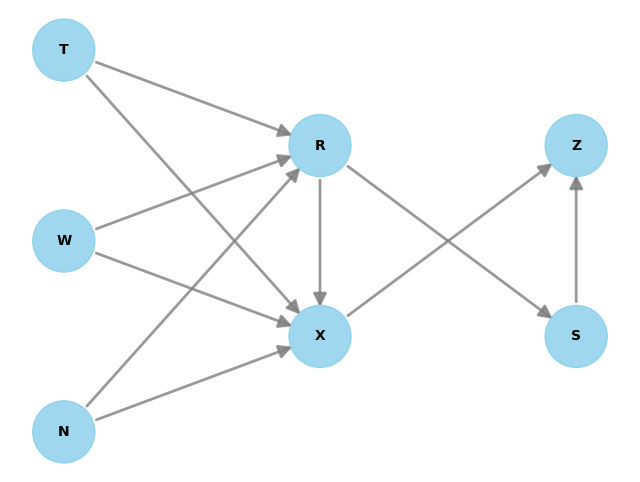

In [ ]:
model3.view_model()

### **2단계-추정량 구하기**

In [ ]:
estimand3 = model3.identify_effect()

In [ ]:
print(estimand3)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d              
────(E[X|N,W,T])
d[R]            
Estimand assumption 1, Unconfoundedness: If U→{R} and U→X then P(X|R,N,W,T,U) = P(X|R,N,W,T)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
 d              
────(E[X|N,W,T])
d[R]            
Estimand assumption 1, Unconfoundedness: If U→{R} and U→X then P(X|R,N,W,T,U) = P(X|R,N,W,T)



### **3단계-추정!**

#### **linear model**

In [ ]:
estimate_lr3 = model3.estimate_effect(
    identified_estimand=estimand3,
    method_name='backdoor.linear_regression'
)

/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [ ]:
print(f'Estimate of causal effect (linear regression) : {estimate_lr3.value}')

Estimate of causal effect (linear regression) : -75229.39667012729


#### **DML**

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
estimate3 = model3.estimate_effect(
    identified_estimand=estimand3,
    method_name='backdoor.econml.dml.DML',
    method_params={
        'init_params' : {
            'model_y' : GradientBoostingRegressor(),
            'model_t' : GradientBoostingRegressor(),
            'model_final' : LassoCV(fit_intercept=False)
        },
    'fit_params': {}}
)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [ ]:
print(f'Estimate of causal effect (DML) : {estimate3.value}')

Estimate of causal effect (DML) : -59799.9937188024


### **4단계-반박하기**

#### **linear model**

In [ ]:
random_cause = model3.refute_estimate(
    estimand=estimand3,
    estimate=estimate_lr3,
    method_name='random_common_cause'
)

/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

In [ ]:
print(random_cause)

Refute: Add a random common cause
Estimated effect:-75229.39667012729
New effect:-74641.55207122905
p value:0.96



In [ ]:
placebo_refuter = model3.refute_estimate(
    estimand=estimand3,
    estimate=estimate_lr3,
    method_name='placebo_treatment_refuter'
)

/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

In [ ]:
print(placebo_refuter)

Refute: Use a Placebo Treatment
Estimated effect:-75229.39667012729
New effect:0.0016248226165771484
p value:0.0



#### **DML**

In [ ]:
random_cause = model3.refute_estimate(
    estimand=estimand3,
    estimate=estimate3,
    method_name='random_common_cause'
)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a

In [ ]:
print(random_cause)

Refute: Add a random common cause
Estimated effect:-59799.9937188024
New effect:-41233.40606430725
p value:0.6200000000000001

